# Matplotlib and Seaborn

Python provides many packages to support numerical calculations. In practice, however, besides operating on numbers, in some cases we have to work with images. This is the time for us to use the visualization packages. In this script, we will introduce two frequently-used packages to process images, i.e., Seaborn and Matplotlib. Let's go through the tutorials step by step to see the functions of these two packages and figure out what we can do with these two packages.

When stepping into big data era, one has to face various data in multiple formats. Among them, the most simple case is your data be in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

* each variable is a column
* each observation is a row
* each type of observational unit is a table

This script targets on illustrate Matplotlib and Seaborn packages. As a consequence, the data provided to you in the script will all be tidy, in practice, however, you may need to perform **tidying work before exploration**. You should be comfortable with reshaping your data or perform transformations to split or combine features in your data, resulting in new data columns. This work should be performed in the wrangling stage of the data analysis process, so if you need to know more about these operations, it is recommended that you refer back to the data wrangling content from earlier in the program.

In this course, we will use Numpy and Pandas to store the data, and Matplotlib and Seaborn to create our visualization.

* Data exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# magic command: allow plots to be rendered directly inside the notebook
%matplotlib inline

In [4]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape, type(pokemon))
pokemon.head(5)

(800, 13) <class 'pandas.core.frame.DataFrame'>


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 1. Bar chart

A **bar chart** is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">countplot</code> function:

<AxesSubplot:xlabel='Generation', ylabel='count'>

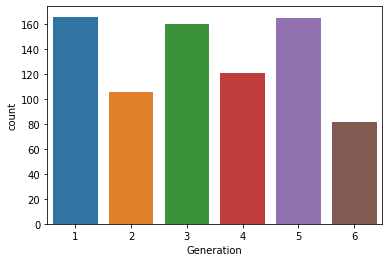

In [32]:
sb.countplot(data = pokemon, x = 'Generation')

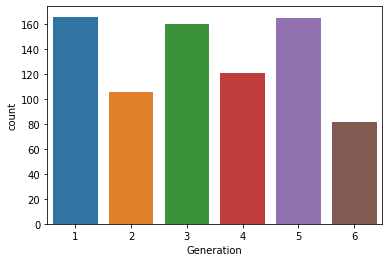

In [33]:
sb.countplot(data = pokemon, x = 'Generation');  # disable the text information by adding a semicolon at end

* Visualize the color panel

In [35]:
sb.color_palette()
# ----------------------------------------------------------------------#
#        You can uncomment the following code to see the results        #
#        The hotkey to uncomment: Ctrl + /                              #
# --------------------------------------------------------------------- #
# print(sb.color_palette())  # print the color panel in (R, G, B) format

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">color</code> parameter:

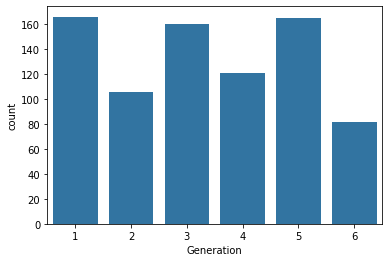

In [36]:
# Unify the color to make the plot cleaner
# ----------------------------------------
base_color = sb.color_palette()[0]  # select the first color in the panel as the bar color

sb.countplot(data = pokemon, x = 'Generation', color=base_color);  # setting the color through 
                                                                  # color argument

One thing that we might want to do with a bar chart is to **sort the data** in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a **pandas DataFrame**, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

Value of gen_order: Int64Index([1, 5, 3, 4, 2, 6], dtype='int64')


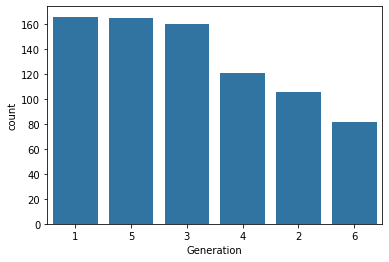

In [30]:
base_color = sb.color_palette()[0]

# use value_counts() method to sort the number list
gen_order = pokemon['Generation'].value_counts().index
print('Value of gen_order:', gen_order)  # show what the gen_order looks like

# Plot the ordered bar chart by setting the order argument
sb.countplot(data = pokemon, x = 'Generation', color = base_color, order = gen_order);

Reading materials: (Documentation: [Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

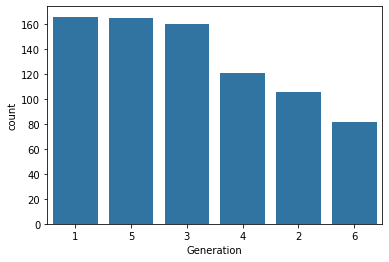

In [29]:
# Notice: you can also sort the bar plot manually.
sb.countplot(data = pokemon, x = 'Generation', color = base_color, order = [1, 5, 3, 4, 2, 6]);

Let's move on to a different category variable <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">Type 1</code>, and generate the bar chart.

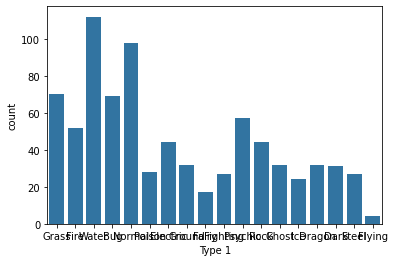

In [43]:
# Example: rotate the labels of x-axis

base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'Type 1', color = base_color);
# plt.xticks(rotation = 90);  # by setting the rotation args to 90, the labels are turned 90 degree

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter <code style="color:#fff;background-color:#2f3d48;border-radius: 4px;border: 1px solid #737b83;padding: 2px 4px">y</code>:

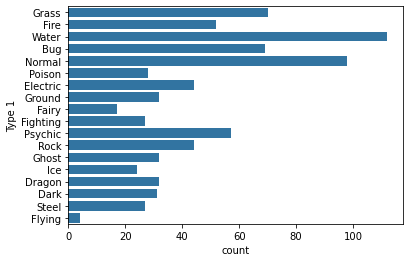

In [52]:
# Example: plot the horizontal bar chart

base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, y = 'Type 1', color = base_color);

* Sort the bar chart according to the order

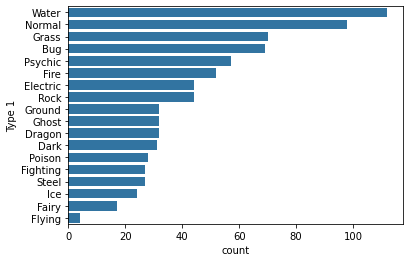

In [53]:
type_order = pokemon['Type 1'].value_counts().index
sb.countplot(data = pokemon, y = 'Type 1', color = base_color, order = type_order);

## 2. Pie Charts
A **pie chart** is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

![](../materials/images/projects/piecharts2.png)

Pie chart (left) and bar chart (right) displaying the same categorical counts.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

* Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
* Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
* Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.